In [44]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
import matplotlib as mpl

warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2


rc = {'text.color': 'black',
      'axes.labelcolor': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'axes.edgecolor': 'black',
      'font.family': 'Helvetica',
      'figure.dpi': 72 * 2,
      'savefig.dpi': 72 * 4
      }
mpl.rcParams.update(rc)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D')
fig_dir = '/Volumes/server/Projects/sfp_nsd/derivatives/figures'
lr = 0.0005
max_epoch = 30000
dset='nsdsyn'
roi_list = ['V1','V2','V3']
vsc='pRFsize'
nsd_subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(i, 'broderick') for i in broderick_sn_list]
ARGS_2D = ['sub','lr','eph','roi','dset']


# NSD 
## model

In [24]:
pt_file_list = []
dset = 'nsdsyn'
for subj, roi in itertools.product(nsd_subj_list, ['V1','V2','V3']):
    file_name = os.path.join(results_dir, dset, f'model-params_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(file_name)
nsd_params = model.load_all_models(pt_file_list, *ARGS_2D)

## NSD precision

In [25]:
nsd_precision_s =  pd.read_csv(os.path.join(output_dir, 'dataframes', dset, 'precision', f'precision-s_dset-{dset}_vs-pRFsize.csv'))
nsd_df = pd.merge(nsd_params, nsd_precision_s[['sub','vroinames','precision']], on=['sub','vroinames'])

# Broderick et al
## model

In [51]:
pt_file_list = []
dset = 'broderick'
tfunc_types=['corrected','uncorrected']
for subj, roi, tfunc in itertools.product(broderick_subj_list, ['V1'], tfunc_types):
    file_name = os.path.join(results_dir, dset, f'tfunc-{tfunc}_model_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(file_name)
broderick_params = model.load_all_models(pt_file_list, *ARGS_2D+['tfunc'])

In [54]:
broderick_params.replace({'tfunc': {'derick/tfunc corrected': 'corrected', 'derick/tfunc uncorrected': 'uncorrected'}}, inplace=True)
broderick_params

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,lr_rate,max_epoch,vroinames,dset,tfunc
0,2.984467,0.071135,0.399834,-0.003961,-0.020345,0.011555,0.004440,0.011346,-0.005278,wlsubj001,0.0005,30000,V1,broderick,corrected
0,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004068,0.031463,-0.007001,wlsubj001,0.0005,30000,V1,broderick,uncorrected
0,2.210294,0.192392,0.318329,0.012519,-0.027342,0.038427,-0.009277,0.003553,0.011274,wlsubj006,0.0005,30000,V1,broderick,corrected
0,2.207109,0.192176,0.318107,0.072608,-0.027166,0.036557,-0.007610,0.047668,0.008029,wlsubj006,0.0005,30000,V1,broderick,uncorrected
0,1.861225,0.124606,0.324291,0.002136,-0.055713,0.175306,-0.005518,0.012415,0.015643,wlsubj007,0.0005,30000,V1,broderick,corrected
0,1.859342,0.123786,0.328891,0.060558,-0.059643,0.160647,-0.005875,0.033474,0.018537,wlsubj007,0.0005,30000,V1,broderick,uncorrected
0,1.847646,0.138592,0.190539,0.007567,-0.044612,0.032485,-0.014709,0.015500,-0.013700,wlsubj045,0.0005,30000,V1,broderick,corrected
0,1.840544,0.137352,0.193664,0.066272,-0.050525,0.016385,-0.014026,0.080798,-0.027560,wlsubj045,0.0005,30000,V1,broderick,uncorrected
0,2.236959,0.101968,0.220886,0.014716,-0.016538,0.094157,0.019891,0.001901,-0.008564,wlsubj046,0.0005,30000,V1,broderick,corrected
0,2.236622,0.101693,0.221743,0.039321,-0.023547,0.083701,0.022037,0.039006,-0.012660,wlsubj046,0.0005,30000,V1,broderick,uncorrected


## broderick precision

In [82]:
broderick_precision_s =  pd.read_csv(os.path.join(output_dir, 'dataframes', dset, 'precision', f'precision-s_dset-{dset}_vs-pRFsize.csv'))
all_broderick_df = pd.merge(broderick_params, broderick_precision_s[['sub','vroinames','precision']], on=['sub','vroinames'])

In [83]:
all_broderick_df

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,lr_rate,max_epoch,vroinames,dset,tfunc,precision
0,2.984467,0.071135,0.399834,-0.003961,-0.020345,0.011555,0.004440,0.011346,-0.005278,wlsubj001,0.0005,30000,V1,broderick,corrected,10.369273
1,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004068,0.031463,-0.007001,wlsubj001,0.0005,30000,V1,broderick,uncorrected,10.369273
2,2.210294,0.192392,0.318329,0.012519,-0.027342,0.038427,-0.009277,0.003553,0.011274,wlsubj006,0.0005,30000,V1,broderick,corrected,10.957087
3,2.207109,0.192176,0.318107,0.072608,-0.027166,0.036557,-0.007610,0.047668,0.008029,wlsubj006,0.0005,30000,V1,broderick,uncorrected,10.957087
4,1.861225,0.124606,0.324291,0.002136,-0.055713,0.175306,-0.005518,0.012415,0.015643,wlsubj007,0.0005,30000,V1,broderick,corrected,3.795616
5,1.859342,0.123786,0.328891,0.060558,-0.059643,0.160647,-0.005875,0.033474,0.018537,wlsubj007,0.0005,30000,V1,broderick,uncorrected,3.795616
6,1.847646,0.138592,0.190539,0.007567,-0.044612,0.032485,-0.014709,0.015500,-0.013700,wlsubj045,0.0005,30000,V1,broderick,corrected,5.359912
7,1.840544,0.137352,0.193664,0.066272,-0.050525,0.016385,-0.014026,0.080798,-0.027560,wlsubj045,0.0005,30000,V1,broderick,uncorrected,5.359912
8,2.236959,0.101968,0.220886,0.014716,-0.016538,0.094157,0.019891,0.001901,-0.008564,wlsubj046,0.0005,30000,V1,broderick,corrected,5.286819
9,2.236622,0.101693,0.221743,0.039321,-0.023547,0.083701,0.022037,0.039006,-0.012660,wlsubj046,0.0005,30000,V1,broderick,uncorrected,5.286819


In [86]:
broderick_df = all_broderick_df.query('tfunc == "corrected"')
broderick_df['dset_type'] = 'Broderick et al. V1, corrected'
nsd_df['dset_type'] = nsd_df['vroinames'].apply(lambda x: f'NSD {x}')
final_df = pd.concat((broderick_df, nsd_df), axis=0)

In [95]:
params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]
fig_name_2 = f'fig-params_lr-{lr}_eph-{max_epoch}_dset-all_sub-all_roi-V1V2V3_vs-{vsc}.svg'
ylim_list = [(1.6, 4.75), (0.03, 0.5), (-0.15, 0.15),(-0.86, 0.28), (-0.04, 0.065)]
yticks_list = [[2, 3, 4], [0.1, 0.3, 0.5], [-0.15,0,0.15], [-0.8, -0.4,0], [-0.03,0,0.03,0.06]]
a = [3,2,0]

roi_pal = [sns.color_palette('dark', 10)[:][k] for k in a]
roi_pal.insert(0, (0.5,0.5,0.5))

grid = vis2D.plot_precision_weighted_avg_parameters(final_df,
                                                    params_list,
                                                    group,
                                                    hue='dset_type',
                                                    hue_order=['Broderick et al. V1, corrected',
                                                               'NSD V1', 
                                                               'NSD V2',
                                                               'NSD V3'],
                                                    lgd_title='ROI',
                                                    height=7,
                                                    pal=roi_pal,
                                                    dodge=0.26,
                                                    dot_scale=1,
                                                    ylim_list=ylim_list,
                                                    ytick_list=yticks_list,
                                                    save_path=None)

TypeError: type object got multiple values for keyword argument 'height'

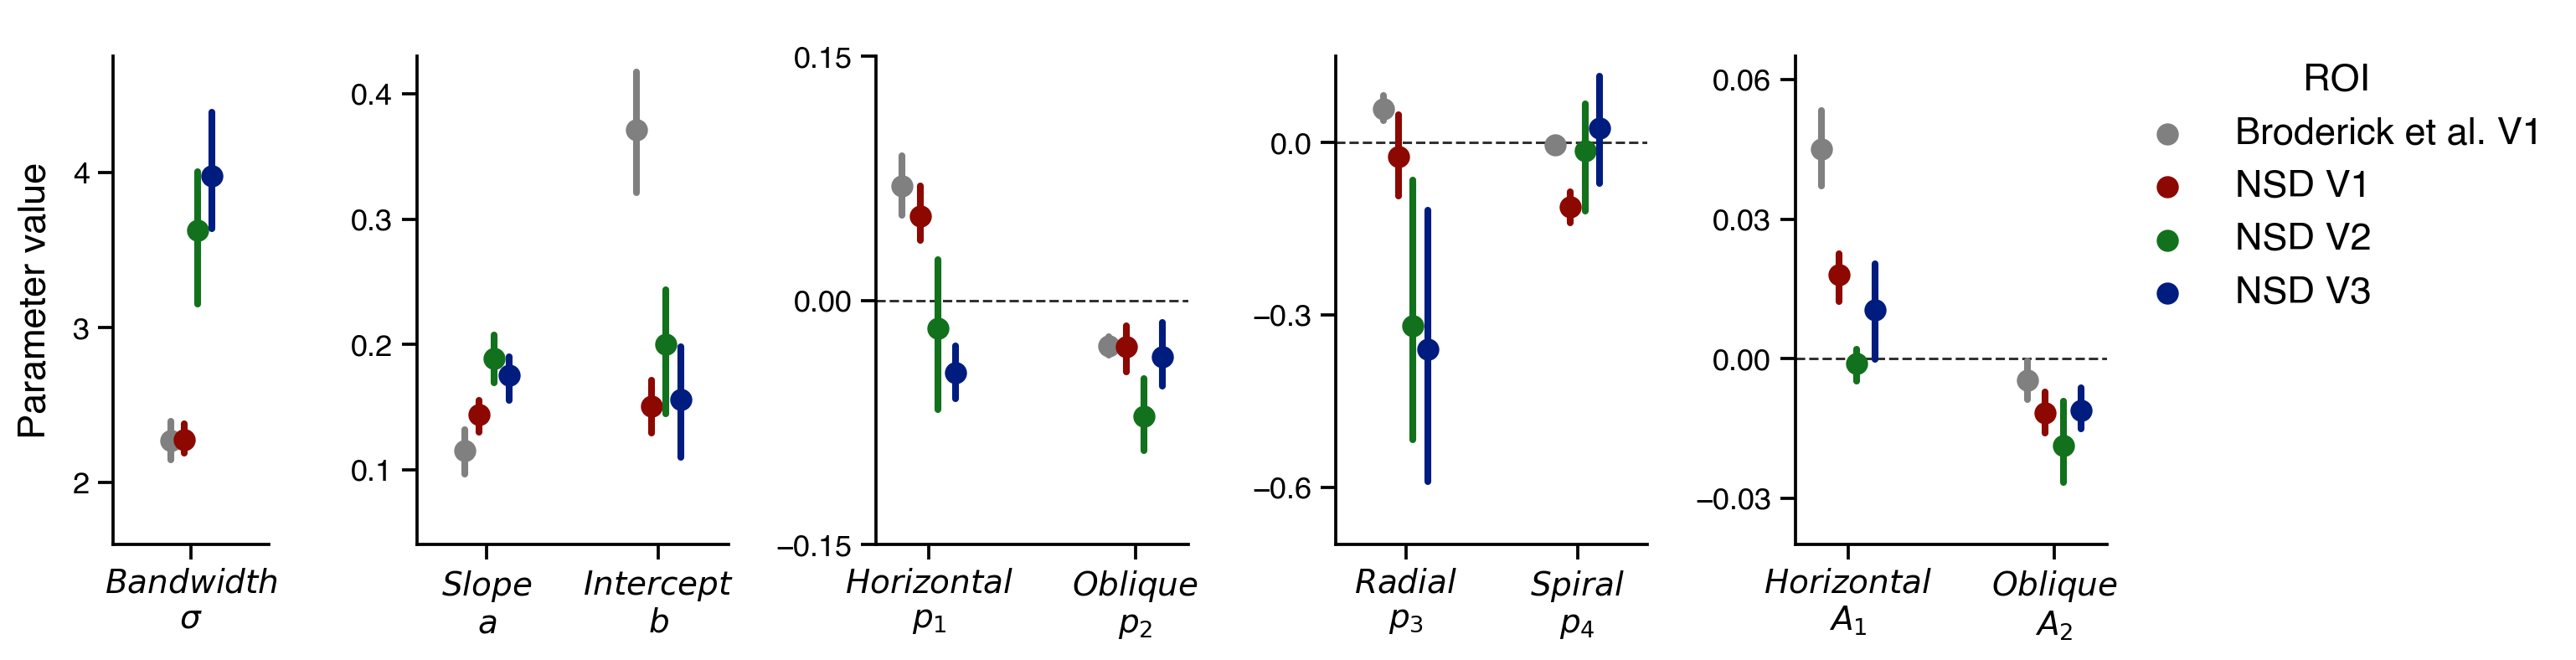

In [117]:
broderick_df = all_broderick_df.query('tfunc == "uncorrected"')
broderick_df['dset_type'] = 'Broderick et al. V1'
nsd_df['dset_type'] = nsd_df['vroinames'].apply(lambda x: f'NSD {x}')
final_df = pd.concat((broderick_df, nsd_df), axis=0)

params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]
fig_name_2 = f'fig-params_lr-{lr}_eph-{max_epoch}_dset-all_sub-all_roi-V1V2V3_vs-{vsc}.svg'
ylim_list = [(1.6, 4.75), (0.04, 0.43), (-0.15, 0.15),(-0.7, 0.15), (-0.04, 0.065)]
yticks_list = [[2, 3, 4], [0.1, 0.2,0.3,0.4], [-0.15,0,0.15], [-0.6, -0.3,0], [-0.03,0,0.03,0.06]]
a = [3,2,0]

roi_pal = [sns.color_palette('dark', 10)[:][k] for k in a]
roi_pal.insert(0, (0.5,0.5,0.5))

grid = vis2D.plot_precision_weighted_avg_parameters(final_df,
                                                    params_list,
                                                    group,
                                                    hue='dset_type',
                                                    hue_order=['Broderick et al. V1',
                                                               'NSD V1', 
                                                               'NSD V2',
                                                               'NSD V3'],
                                                    lgd_title='ROI',
                                                    width=6,
                                                    pal=roi_pal,
                                                    dodge=0.26,
                                                    dot_scale=1,
                                                    ylim_list=ylim_list,
                                                    ytick_list=yticks_list,
                                                    save_path='/Users/jh7685/Dropbox/NYU/Projects/SF/test.pdf')



In [72]:
uncorrected_df = final_df.query('tfunc == "uncorrected" & dset == "broderick"')
corrected_df = final_df.query('tfunc == "corrected" & dset == "broderick"')
nsd_v1_df = final_df.query('dset == "nsdsyn" & vroinames == "V1"')

uncorrected_df['dset_type'] = 'Broderick et al'
corrected_df['dset_type'] = 'Broderick et al, corrected'
nsd_v1_df['dset_type'] = 'NSD V1'

In [96]:

b_df_all = pd.concat((uncorrected_df, corrected_df), axis=0)
b_df_all = pd.concat((b_df_all, nsd_v1_df), axis=0)

params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]
fig_name_2 = f'fig-params_lr-{lr}_eph-{max_epoch}_dset-all_sub-all_roi-V1V2V3_vs-{vsc}.svg'
ylim_list = [(1.6, 4.75), (0.03, 0.5), (-0.15, 0.15),(-0.86, 0.28), (-0.04, 0.065)]
yticks_list = [[2, 3, 4], [0.1, 0.3, 0.5], [-0.15,0,0.15], [-0.8, -0.4,0], [-0.03,0,0.03,0.06]]
a = [3,2,0]

roi_pal = [sns.color_palette('dark', 10)[:][k] for k in a]
roi_pal.insert(0, (0.5,0.5,0.5))

grid = vis2D.plot_precision_weighted_avg_parameters(b_df_all,
                                                    params_list,
                                                    group,
                                                    hue='dset_type',
                                                    hue_order=['Broderick et al',
                                                               'Broderick et al, corrected',
                                                               'NSD V1'],
                                                    lgd_title='ROI',
                                                    height=7,
                                                    pal=[(0,0,0), (0.5,0.5,0.5), roi_pal[1]],
                                                    dodge=0.26,
                                                    dot_scale=1,
                                                    ylim_list=None,
                                                    ytick_list=None,
                                                    save_path=None)

TypeError: type object got multiple values for keyword argument 'height'